In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
from datetime import datetime
from pandas_datareader import data as web
from datetime import datetime 

from pylab import rcParams
rcParams['axes.xmargin'] = 0
rcParams['axes.ymargin'] = 0
plt.style.use('bmh')

pd.set_option('precision', 4)

In [2]:
start = datetime(2000, 1, 1)
end = pd.datetime.now()

data = web.get_data_yahoo('^GDAXI', start=start, end=end)
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,7159.3301,6720.8701,6961.7202,6750.7598,4.3072e+07,6750.7598
2000-01-04,6755.3599,6510.4600,6747.2402,6586.9502,4.6678e+07,6586.9502
2000-01-05,6585.8501,6388.9102,6585.8501,6502.0698,5.2683e+07,6502.0698
2000-01-06,6539.3101,6402.6299,6501.4502,6474.9199,4.1181e+07,6474.9199
2000-01-07,6791.5298,6470.1401,6489.9399,6780.9600,5.6059e+07,6780.9600


In [3]:
data.drop(['Volume','Adj Close'],axis=1, inplace=True)
data.tail()

,High,Low,Open,Close
Date,,,,
2019-01-07,10814.4697,10681.2695,10814.3896,10747.8096
2019-01-08,10910.7100,10745.0303,10750.1904,10803.9805
2019-01-09,10961.9199,10839.0898,10884.7500,10893.3203
2019-01-10,10927.1299,10788.0498,10843.8896,10921.5898
2019-01-11,10959.0000,10829.9199,10949.1299,10887.4600


In [4]:
data = data[['Open','High','Low','Close']]
data.tail()

,Open,High,Low,Close
Date,,,,
2019-01-07,10814.3896,10814.4697,10681.2695,10747.8096
2019-01-08,10750.1904,10910.7100,10745.0303,10803.9805
2019-01-09,10884.7500,10961.9199,10839.0898,10893.3203
2019-01-10,10843.8896,10927.1299,10788.0498,10921.5898
2019-01-11,10949.1299,10959.0000,10829.9199,10887.4600


In [5]:
# upRange=1
# downRange=2
# insideDay=3
# outsideDay=4

data['Category'] = np.where((data.High>data.High.shift(1)) & (data.Low > data.Low.shift(1)),'upRange',
                   np.where((data.High<data.High.shift(1)) & (data.Low < data.Low.shift(1)),'downRange',
                   np.where((data.High<data.High.shift(1)) & (data.Low > data.Low.shift(1)),'insideDay',
                   np.where((data.High>data.High.shift(1)) & (data.Low < data.Low.shift(1)),'outsideDay',0))))

In [6]:
data.groupby('Category').count()

,Open,High,Low,Close
Category,,,,
0,3,3,3,3
downRange,1757,1757,1757,1757
insideDay,538,538,538,538
outsideDay,472,472,472,472
upRange,2060,2060,2060,2060


In [7]:
data[data.Category ==0]

,Open,High,Low,Close,Category
Date,,,,,


In [8]:
data['2017-03-27':'2017-04-01']

,Open,High,Low,Close,Category
Date,,,,,
2017-03-27,11957.6504,11996.3496,11916.0703,11996.0703,downRange
2017-03-28,12062.6904,12158.7197,12045.1699,12149.4199,upRange
2017-03-29,12195.8604,12233.7598,12180.8301,12203.0000,upRange
2017-03-30,12220.6396,12258.3701,12200.3398,12256.4297,upRange
2017-03-31,12241.5703,12313.2900,12230.1699,12312.8701,upRange


In [9]:
data.groupby('Category').count().T

Category,0,downRange,insideDay,outsideDay,upRange
Open,3,1757,538,472,2060
High,3,1757,538,472,2060
Low,3,1757,538,472,2060
Close,3,1757,538,472,2060


In [10]:
category = data.groupby([data.index.year,'Category'])['Close'].count().unstack()
category.drop('0', axis=1, inplace=True)
category = category[['upRange','downRange', 'insideDay','outsideDay']]
category

Category,upRange,downRange,insideDay,outsideDay
Date,,,,
2000,104.0,101.0,26.0,22.0
2001,91.0,111.0,29.0,21.0
2002,98.0,116.0,18.0,21.0
2003,107.0,82.0,34.0,30.0
2004,111.0,83.0,39.0,24.0
2005,133.0,70.0,30.0,24.0
2006,131.0,76.0,28.0,20.0
2007,122.0,90.0,20.0,20.0
2008,91.0,119.0,21.0,23.0


In [11]:
category.sum(axis=1)

Date
2000    253.0
2001    252.0
2002    253.0
2003    253.0
2004    257.0
2005    257.0
2006    255.0
2007    252.0
2008    254.0
2009    254.0
2010    256.0
2011    256.0
2012    253.0
2013    251.0
2014    252.0
2015    253.0
2016    255.0
2017    252.0
2018    251.0
2019      8.0
dtype: float64

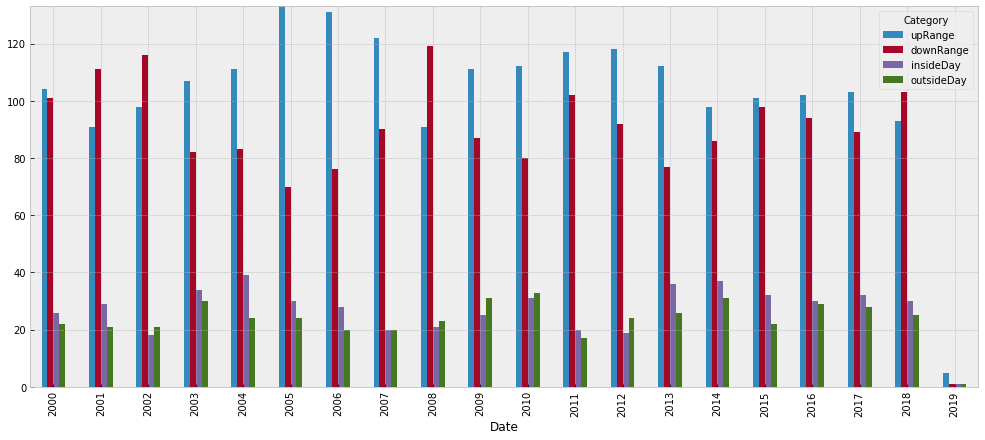

In [12]:
# Displaying all categories/year via plot
category1 = category.div(category.sum(axis=1), axis=0)*100
category.plot(kind='bar', figsize=(17,7));

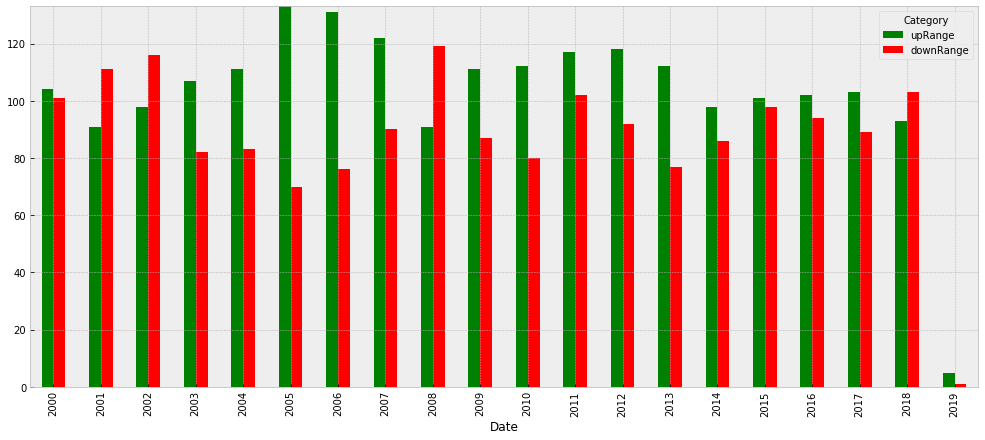

In [13]:
category[['upRange','downRange']].plot(kind='bar', figsize=(17,7),color=['g','r']);

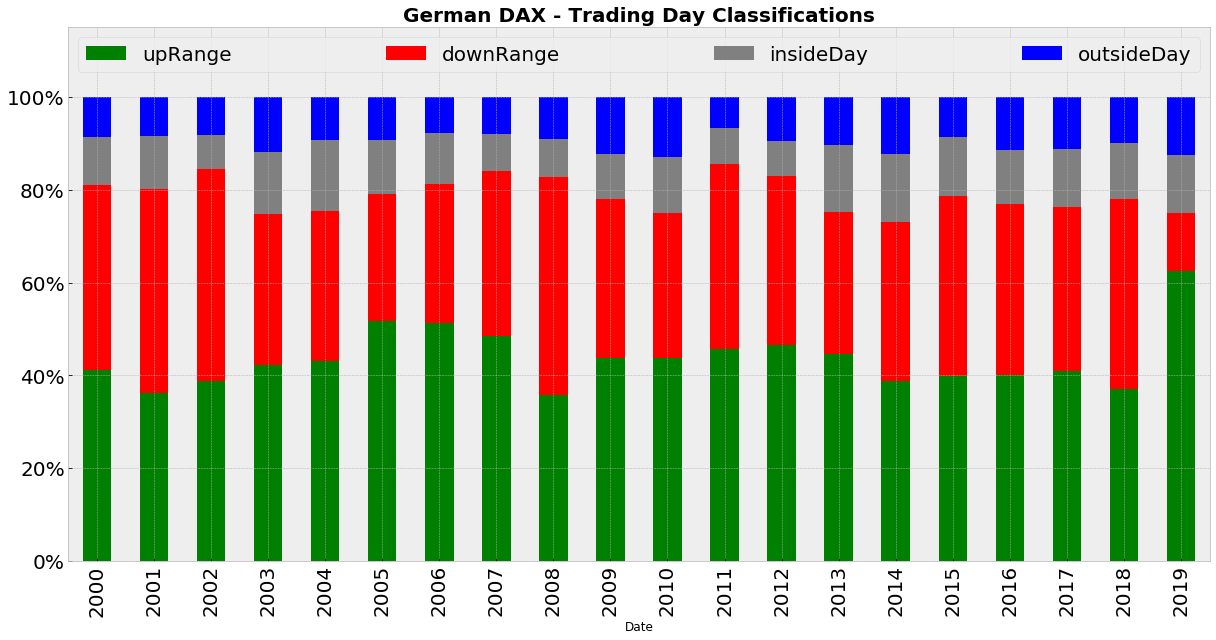

In [14]:
# Plotting as a percentage of every year 
ax = category1.plot(kind='bar', figsize=(17,9),color=['g','r','gray','b'], stacked=True);
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.title('German DAX - Trading Day Classifications', fontsize=20, fontweight='bold')
plt.legend(mode='expand', ncol=4, fontsize=20)
plt.ylim(0,115)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.tight_layout();

In [15]:
# calculating daily return 
data['Ret'] = np.log(data.Close/data.Close.shift(1))
data.head()

,Open,High,Low,Close,Category,Ret
Date,,,,,,
2000-01-03,6961.7202,7159.3301,6720.8701,6750.7598,0,NaN
2000-01-04,6747.2402,6755.3599,6510.4600,6586.9502,downRange,-0.0246
2000-01-05,6585.8501,6585.8501,6388.9102,6502.0698,downRange,-0.0130
2000-01-06,6501.4502,6539.3101,6402.6299,6474.9199,insideDay,-0.0042
2000-01-07,6489.9399,6791.5298,6470.1401,6780.9600,upRange,0.0462


In [16]:
# appending all returns for each category 
ret1, ret2, ret3, ret4=[],[],[],[]

for i in range(len(data)-1):
    if data.iloc[i,4] == 'upRange':
        ret1.append(data.iloc[i+1,5])
    elif data.iloc[i,4] == 'downRange':
        ret2.append(data.iloc[i+1,5])
    elif data.iloc[i,4] == 'insideDay':
        ret3.append(data.iloc[i+1,5])
    elif data.iloc[i,4] == 'outsideDay':
        ret4.append(data.iloc[i+1,5])

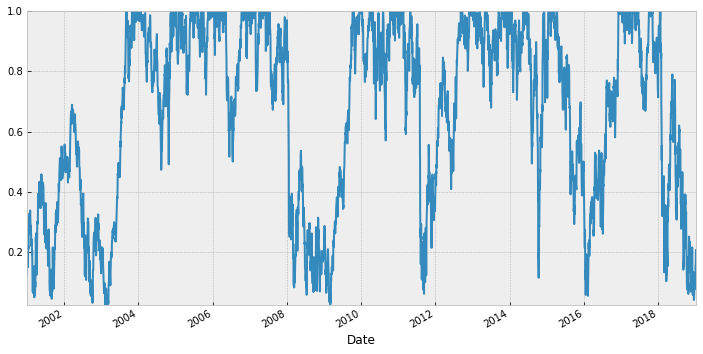

In [17]:
# copy dataFrame to data2 and calculate 52 weeks high/low
data2 = data.copy()
data2['52Whl'] = (data2.High - data2.Low.rolling(252).min()) / (data2.High.rolling(252).max() - data2.Low.rolling(252).min())
data2.dropna(inplace=True)
data2['52Whl'].plot(figsize=(12,6));

In [18]:
# classifying --> above 75% of 52 High/Low range as 1
#                 below 25% of 52 High/Low range as -1

data2['52Whl'] = data2['52Whl'].round(2)
data2['52wHL.25UD'] = np.where(data2['52Whl'] > 0.75, 1, 0)
data2['52wHL.25UD'] = np.where(data2['52Whl'] < 0.25, -1, data2['52wHL.25UD'])

In [19]:
# calculate occurrences of bar types if above 75% of yearly 52 weeks range
data2[data2['52wHL.25UD']==1].groupby('Category').size()/len(data2[data2['52wHL.25UD']==1])

Category
0             0.0004
downRange     0.3048
insideDay     0.1169
outsideDay    0.1064
upRange       0.4715
dtype: float64

In [20]:
# calculate occurrences of bar types if below 25% of yearly 52 weeks range
data2[data2['52wHL.25UD']==-1].groupby('Category').size()/len(data2[data2['52wHL.25UD']==-1])

Category
downRange     0.5087
insideDay     0.1008
outsideDay    0.0803
upRange       0.3102
dtype: float64

In [21]:
data2[data2['Category']=='0']

,Open,High,Low,Close,Category,Ret,52Whl,52wHL.25UD
Date,,,,,,,,
2001-03-28,5938.2100,5938.2100,5775.4399,5817.5200,0,-0.0205,0.25,0
2013-11-12,9102.9902,9124.2402,9073.9297,9076.4805,0,-0.0035,0.97,1


In [22]:
data2.Category.unique()

array(['upRange', 'downRange', 'outsideDay', 'insideDay', '0'],
      dtype=object)

In [23]:
data3= data2[data2.Category!='0']
data3.Category.unique()

array(['upRange', 'downRange', 'outsideDay', 'insideDay'], dtype=object)

In [24]:
(data3[data3['52wHL.25UD']==1].groupby('Category').size())/len(data3[data3['52wHL.25UD']==1])

Category
downRange     0.3049
insideDay     0.1170
outsideDay    0.1064
upRange       0.4717
dtype: float64

### Compering Up/Down range days relative to the location of the market if it's above 0.75 of the 52 weeks high-low or at the bottom 0.25 of the range. Can be a filter.

In [25]:
d = ((data3[data3['52wHL.25UD']==-1].groupby('Category').size()) /len(data3[data3['52wHL.25UD']==-1])*100)\
.sort_values(ascending=False)

In [26]:
u = ((data3[data3['52wHL.25UD']==1].groupby('Category').size()) /len(data3[data3['52wHL.25UD']==1])*100)\
.sort_values(ascending=False)

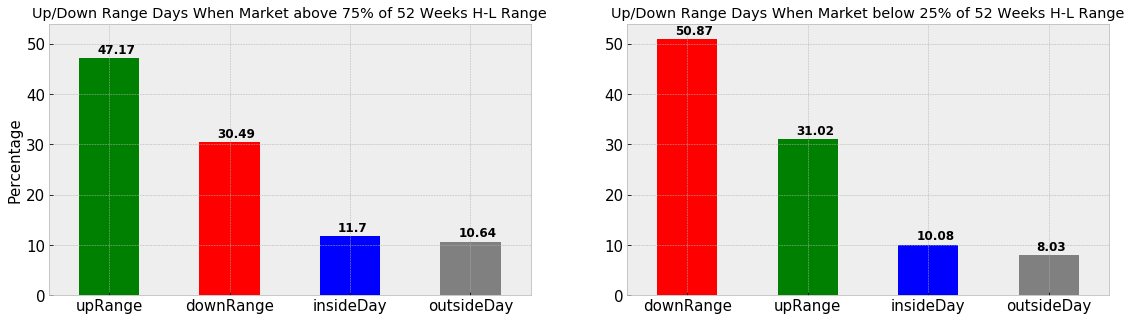

In [27]:
plt.subplot(1,2,1);(data3[data3['52wHL.25UD']==1]['Category'].sort_values().value_counts(normalize=True)*100)\
.plot(kind='bar',figsize=(19,5),title='Up/Down Range Days When Market above 75% of 52 Weeks H-L Range', ylim=(0,54),
 color=['g', 'r', 'b','grey'], fontsize=15);plt.xticks(rotation=0);plt.ylabel('Percentage',size=15)
annotate1 = [plt.text(i-0.1 , txt+1,(round(u[i],2)), fontweight='bold',size=12) for i, txt in enumerate(u)]
plt.subplot(1,2,2);(data3[data3['52wHL.25UD']==-1]['Category'].sort_values().value_counts(normalize=True)*100)\
.plot(kind='bar',figsize=(19,5),title='Up/Down Range Days When Market below 25% of 52 Weeks H-L Range',ylim=(0,54),
 color=['r', 'g', 'b','grey'], fontsize=15);plt.xticks(rotation=0);
annotate2 = [plt.text(i-0.1, txt+1,(round(d[i],2)), fontweight='bold', size=12) for i, txt in enumerate(d)]